In [1]:
import numpy as np 
import pandas as pd
import tensorflow as tf 
import matplotlib.pyplot as plt
import matplotlib as mpl

label_size = 14
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size

data = np.array([0,3,4,5])
conv1d_filter = np.array([1,2])


def Conv1D_Numpy(Seq, Kernel):
    kernel_size = len(Kernel)
    Length = len(Seq)
    
    output = []
    for i in range(Length-kernel_size+1): 
        conv = np.dot(Seq[i:i+kernel_size], Kernel)
        print(Seq[i:i+kernel_size], "*", Kernel, "=> ", conv)

        output.append(conv)

    output = np.array(output)
    
    return output

output = Conv1D_Numpy(data, conv1d_filter)
output


[0 3] * [1 2] =>  6
[3 4] * [1 2] =>  11
[4 5] * [1 2] =>  14


array([ 6, 11, 14])

In [3]:
def Conv1D_compile(n_filters, SequenceLength, n_features):
    conv_model = tf.keras.Sequential([
        tf.keras.layers.Conv1D(filters=n_filters,
                               kernel_size=2,
                               strides=1, 
                               padding='valid',
                               input_shape=(SequenceLength, n_features), 
                               use_bias=False, name='c1d')])
    
    conv_model.compile(loss=tf.losses.MeanAbsoluteError(), 
                       optimizer=tf.optimizers.Adam(learning_rate=5e-2))

    conv_model.summary()

    return conv_model     


def Conv1D_Fit_and_PlotWeights(model, X, y, epochs, n_weights, freq=20):
    w, loss, mae = [], [], []

    for r in range(epochs):
        history = model.fit(X, y, verbose=0)
        if r%freq==0:

            w.append(np.sort(model.layers[0].get_weights()[0].reshape(n_weights)))
            loss.append(history.history['loss'][0])

    w = np.array(w)
            
    fig, ax = plt.subplots(figsize=(8,4))

    epoch = np.arange(0,len(w))*20
    
    for n in range(n_weights): 
        label = "w_{} -> {}".format(n, n+1)
        plt.plot(epoch,w[:,n], label=label, linewidth=3)
        ax.axhline(n+1, c='gray', linestyle='--')

    plt.xlabel("epoch", fontsize=14)
    plt.ylabel("weights", fontsize=14)
    plt.legend(loc='upper left', bbox_to_anchor=(1., 1.01), fontsize=14)
    plt.show()



In [5]:
X = data.reshape((1, data.shape[0], 1))
y = output.reshape((1, output.shape[0], 1))

model_cnn = Conv1D_compile(n_filters=1, SequenceLength=4, n_features=1)
model_cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 c1d (Conv1D)                (None, 3, 1)              2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 c1d (Conv1D)                (None, 3, 1)              2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


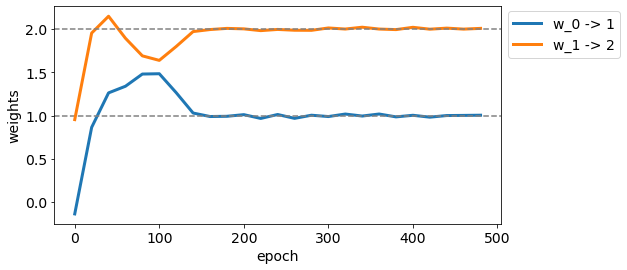

In [6]:
Conv1D_Fit_and_PlotWeights(model=model_cnn, X=X, y=y, 
                                     epochs=500, n_weights=2)
